In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import scikit_posthocs as sp


Bad key "text.kerning_factor" on line 4 in
/Users/samhas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data=pd.read_excel('Resamples.xlsx', index=False)
data

,Datasets,NB,C45,SVML,SVMQ,Logistic,BN,RandF,RotF,MLP,...,BOSS,TSF,TSBF,LPS,ACF,PS,EE,CID_DTW,Flat-COTE,HIVE-COTE
0,Adiac,0.544501,0.492916,0.410179,0.734731,0.621637,0.496573,0.646803,0.753632,0.728670,...,0.749412,0.707187,0.726777,0.764962,0.657545,0.741816,0.664962,0.627391,0.809847,0.815396
1,ArrowHead,0.673371,0.638400,0.811829,0.807486,0.713714,0.705829,0.775200,0.789257,0.787771,...,0.875200,0.789371,0.800857,0.806286,0.694514,0.724514,0.859657,0.829143,0.876800,0.887657
2,Beef,0.506333,0.492667,0.737000,0.766000,0.818000,0.507333,0.598667,0.818667,0.739333,...,0.615000,0.647667,0.554333,0.519667,0.584667,0.709333,0.532000,0.530667,0.764000,0.722667
3,BeetleFly,0.746000,0.687500,0.762500,0.769000,0.750000,0.743000,0.756500,0.791000,0.764000,...,0.948500,0.842500,0.798500,0.892500,0.799500,0.842000,0.822500,0.806000,0.921000,0.959000
4,BirdChicken,0.628500,0.745500,0.682000,0.744500,0.630500,0.751500,0.772000,0.747500,0.708500,...,0.984000,0.838500,0.902000,0.854000,0.887500,0.941000,0.848000,0.848500,0.941000,0.950500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Wine,0.612778,0.756481,0.864815,0.918148,0.938519,0.725370,0.863519,0.918519,0.900556,...,0.911667,0.880556,0.879259,0.884259,0.773704,0.798704,0.886667,0.891296,0.903519,0.912037
81,WordSynonyms,0.481614,0.374044,0.530110,0.587351,0.338981,0.250141,0.565580,0.586113,0.554342,...,0.658762,0.643464,0.668981,0.728135,0.393699,0.371003,0.778401,0.738339,0.748072,0.747962
82,Worms,0.342727,0.406883,0.386753,0.480779,0.392468,0.414026,0.591948,0.604675,0.406104,...,0.734935,0.627922,0.668442,0.641558,0.718831,0.684156,0.644416,0.633377,0.725065,0.734026
83,WormsTwoClass,0.545714,0.600390,0.544545,0.592078,0.569221,0.561688,0.628052,0.656883,0.598571,...,0.809740,0.685065,0.754935,0.742597,0.770390,0.759351,0.717403,0.735844,0.785195,0.783896


In [3]:
data.columns

Index(['Datasets', 'NB', 'C45', 'SVML', 'SVMQ', 'Logistic', 'BN', 'RandF',
       'RotF', 'MLP', 'Euclidean_1NN', 'DTW_R1_1NN', 'DTW_Rn_1NN',
       'DDTW_R1_1NN', 'DDTW_Rn_1NN', 'ERP_1NN', 'LCSS_1NN', 'MSM_1NN',
       'TWE_1NN', 'WDDTW_1NN', 'WDTW_1NN', 'DD_DTW', 'DTD_C', 'DTW_F', 'ST',
       'LS', 'FS', 'BoP', 'SAXVSM', 'BOSS', 'TSF', 'TSBF', 'LPS', 'ACF', 'PS',
       'EE', 'CID_DTW', 'Flat-COTE', 'HIVE-COTE'],
      dtype='object')

In [4]:
d='''
BOSS,Flat-COTE,LPS,TSBF,DDTW_R1_1NN
'''.strip().split(',')
print (d)

['BOSS', 'Flat-COTE', 'LPS', 'TSBF', 'DDTW_R1_1NN']


In [5]:
data_subset=data[['Datasets','BOSS', 'Flat-COTE', 'LPS', 'TSBF', 'DDTW_R1_1NN']]
data_subset

,Datasets,BOSS,Flat-COTE,LPS,TSBF,DDTW_R1_1NN
0,Adiac,0.749412,0.809847,0.764962,0.726777,0.583043
1,ArrowHead,0.875200,0.876800,0.806286,0.800857,0.867600
2,Beef,0.615000,0.764000,0.519667,0.554333,0.533000
3,BeetleFly,0.948500,0.921000,0.892500,0.798500,0.811500
4,BirdChicken,0.984000,0.941000,0.854000,0.902000,0.877500
...,...,...,...,...,...,...
80,Wine,0.911667,0.903519,0.884259,0.879259,0.847593
81,WordSynonyms,0.658762,0.748072,0.728135,0.668981,0.662116
82,Worms,0.734935,0.725065,0.641558,0.668442,0.638182
83,WormsTwoClass,0.809740,0.785195,0.742597,0.754935,0.708831


In [7]:
data_subset.describe()

,BOSS,Flat-COTE,LPS,TSBF,DDTW_R1_1NN
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.833460,0.857942,0.795062,0.798680,0.733565
std,0.148376,0.126728,0.150203,0.142584,0.164182
min,0.256187,0.362031,0.244926,0.277869,0.244475
25%,0.750240,0.785195,0.722195,0.726777,0.636347
50%,0.867388,0.897800,0.825858,0.825385,0.723952
75%,0.950600,0.962229,0.911657,0.902000,0.849417
max,1.000000,1.000000,0.999524,0.996134,1.000000


Text(0.5, 0, 'Models')

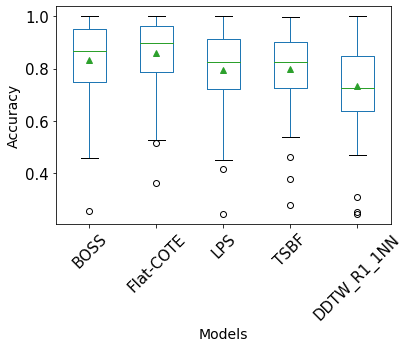

In [6]:
data_subset.boxplot(column=['BOSS', 'Flat-COTE', 'LPS', 'TSBF', 'DDTW_R1_1NN'],grid=False, rot=45, fontsize=15, showmeans=True)
plt.ylabel("Accuracy", size=14)
plt.xlabel("Models", size=14)

In [6]:
Hypothesis= '''
The Null hypotheiss is H0 : 𝜇BOSS = 𝜇BoP
The alternative hypotheiss is H1: 𝜇BOSS != 𝜇BoP
'''
print (Hypothesis)


The Null hypotheiss is H0 : 𝜇BOSS = 𝜇BoP
The alternative hypotheiss is H1: 𝜇BOSS != 𝜇BoP



In [37]:
#perform Friedman Test
stats, pvalue = stats.friedmanchisquare(data_subset['BOSS'], data_subset['Flat-COTE'], data_subset['LPS'],data_subset['TSBF'],data_subset['DDTW_R1_1NN'])

In [38]:
print("Friedman Test",stats)
print("p-value",pvalue)

print ('*'*5,'Significance Level at 0.05','*'*5)
if pvalue <0.05:
  print("we reject null hypothesis (H0) stating that there is a significant difference")
else:
  print("we accept null hypothesis")

print ('*'*5,'Significance Level at  0.013','*'*5)
if pvalue < 0.013:
  print("we reject null hypothesis (H0) stating that there is a significant difference")
else:
  print("we accept null hypothesis")

Friedman Test 181.47851677457317
p-value 3.589186416082089e-38
***** Significance Level at 0.05 *****
we reject null hypothesis (H0) stating that there is a significant difference
***** Significance Level at  0.013 *****
we reject null hypothesis (H0) stating that there is a significant difference


In [11]:
data_subset.melt(id_vars='Datasets', var_name='Models', value_name='Accuracy')

,Datasets,Models,Accuracy
0,Adiac,BOSS,0.749412
1,ArrowHead,BOSS,0.875200
2,Beef,BOSS,0.615000
3,BeetleFly,BOSS,0.948500
4,BirdChicken,BOSS,0.984000
...,...,...,...
420,Wine,DDTW_R1_1NN,0.847593
421,WordSynonyms,DDTW_R1_1NN,0.662116
422,Worms,DDTW_R1_1NN,0.638182
423,WormsTwoClass,DDTW_R1_1NN,0.708831


In [22]:
datar=np.array([data_subset['BOSS'], data_subset['Flat-COTE'], data_subset['LPS'],data_subset['TSBF'],data_subset['DDTW_R1_1NN']])

In [23]:
datar

array([[0.74941176, 0.8752    , 0.615     , 0.9485    , 0.984     ,
        0.855     , 0.99806667, 0.65957031, 0.90038794, 0.98857143,
        0.80232   , 0.7635641 , 0.74925641, 0.77571795, 0.93937909,
        0.81460145, 0.81410072, 0.67302158, 0.74589928, 0.8905    ,
        0.94049333, 0.98334495, 0.79953486, 0.97417752, 0.99556818,
        0.9506    , 0.7021978 , 0.96874286, 0.91953788, 0.91103704,
        0.99406667, 0.836     , 0.902811  , 0.45900564, 0.6053125 ,
        0.50269091, 0.51025252, 0.86600583, 0.83658667, 0.81      ,
        0.66561644, 0.94859469, 0.98033333, 0.71457895, 0.80821306,
        0.66597403, 0.5374026 , 0.8459984 , 0.84090585, 0.90358779,
        0.87      , 0.96739669, 0.82075758, 0.25618671, 0.99790476,
        0.86738832, 0.81897561, 0.77282927, 0.78458667, 0.58597333,
        1.        , 0.9088    , 0.75024   , 0.89742097, 0.88770199,
        0.977551  , 0.9702973 , 0.917664  , 0.96116583, 0.96786667,
        0.92877193, 0.95969231, 0.9999    , 0.98

In [24]:
datar.T

array([[0.74941176, 0.80984655, 0.76496164, 0.72677749, 0.58304348],
       [0.8752    , 0.8768    , 0.80628571, 0.80085714, 0.8676    ],
       [0.615     , 0.764     , 0.51966667, 0.55433333, 0.533     ],
       [0.9485    , 0.921     , 0.8925    , 0.7985    , 0.8115    ],
       [0.984     , 0.941     , 0.854     , 0.902     , 0.8775    ],
       [0.855     , 0.899     , 0.83583333, 0.7955    , 0.73466667],
       [0.99806667, 0.99801111, 0.98446667, 0.97727778, 0.56442222],
       [0.65957031, 0.73556771, 0.64157812, 0.68336719, 0.68076823],
       [0.90038794, 0.98271739, 0.7427971 , 0.71639855, 0.71700725],
       [0.98857143, 0.99964286, 0.95      , 0.98178571, 0.95785714],
       [0.80232   , 0.76968   , 0.726     , 0.76544   , 0.69964   ],
       [0.7635641 , 0.81402564, 0.69597436, 0.73058974, 0.60297436],
       [0.74925641, 0.81494872, 0.70617949, 0.72833333, 0.54482051],
       [0.77571795, 0.82689744, 0.71358974, 0.73758974, 0.58202564],
       [0.93937909, 0.92477124, 0.

In [27]:
#perform Nemenyi post-hoc test
posthoc_test=sp.posthoc_nemenyi_friedman(datar.T)
posthoc_test

,0,1,2,3,4
0,1.000000,0.016353,0.001000,0.001000,0.00100
1,0.016353,1.000000,0.001000,0.001000,0.00100
2,0.001000,0.001000,1.000000,0.579478,0.00176
3,0.001000,0.001000,0.579478,1.000000,0.00100
4,0.001000,0.001000,0.001760,0.001000,1.00000


In [28]:
type(posthoc_test)

pandas.core.frame.DataFrame

In [33]:
posthoc_test=posthoc_test.rename({0:'BOSS', 1:'Flat-COTE', 2:'LPS', 3:'TSBF', 4:'DDTW_R1_1NN'},axis=1)
posthoc_test=posthoc_test.rename({0:'BOSS', 1:'Flat-COTE', 2:'LPS', 3:'TSBF', 4:'DDTW_R1_1NN'})

In [34]:
posthoc_test

,BOSS,Flat-COTE,LPS,TSBF,DDTW_R1_1NN
BOSS,1.000000,0.016353,0.001000,0.001000,0.00100
Flat-COTE,0.016353,1.000000,0.001000,0.001000,0.00100
LPS,0.001000,0.001000,1.000000,0.579478,0.00176
TSBF,0.001000,0.001000,0.579478,1.000000,0.00100
DDTW_R1_1NN,0.001000,0.001000,0.001760,0.001000,1.00000


In [46]:
posthoc_test1= posthoc_test.copy(deep=True)

In [47]:
posthoc_test1=posthoc_test1.reset_index()


In [48]:
posthoc_test1

,index,BOSS,Flat-COTE,LPS,TSBF,DDTW_R1_1NN
0,BOSS,1.000000,0.016353,0.001000,0.001000,0.00100
1,Flat-COTE,0.016353,1.000000,0.001000,0.001000,0.00100
2,LPS,0.001000,0.001000,1.000000,0.579478,0.00176
3,TSBF,0.001000,0.001000,0.579478,1.000000,0.00100
4,DDTW_R1_1NN,0.001000,0.001000,0.001760,0.001000,1.00000


In [53]:
posthoc_test1_melt=posthoc_test1.melt(id_vars='index', var_name='Models', value_name='p-value')

In [54]:
posthoc_test1_melt

,index,Models,p-value
0,BOSS,BOSS,1.000000
1,Flat-COTE,BOSS,0.016353
2,LPS,BOSS,0.001000
3,TSBF,BOSS,0.001000
4,DDTW_R1_1NN,BOSS,0.001000
5,BOSS,Flat-COTE,0.016353
6,Flat-COTE,Flat-COTE,1.000000
7,LPS,Flat-COTE,0.001000
8,TSBF,Flat-COTE,0.001000
9,DDTW_R1_1NN,Flat-COTE,0.001000


# Significance at level 0.05

In [60]:

print("Reject null hypothesis (H0) stating that there is a significant difference")
posthoc_test1_melt[posthoc_test1_melt['p-value'] < 0.05]

Reject null hypothesis (H0) stating that there is a significant difference


,index,Models,p-value
1,Flat-COTE,BOSS,0.016353
2,LPS,BOSS,0.001000
3,TSBF,BOSS,0.001000
4,DDTW_R1_1NN,BOSS,0.001000
5,BOSS,Flat-COTE,0.016353
7,LPS,Flat-COTE,0.001000
8,TSBF,Flat-COTE,0.001000
9,DDTW_R1_1NN,Flat-COTE,0.001000
10,BOSS,LPS,0.001000
11,Flat-COTE,LPS,0.001000


In [59]:
##Significance ta level 0.013
print("Reject null hypothesis (H0) stating that there is a significant difference")
posthoc_test1_melt[posthoc_test1_melt['p-value'] <  0.013]

Reject null hypothesis (H0) stating that there is a significant difference


,index,Models,p-value
2,LPS,BOSS,0.00100
3,TSBF,BOSS,0.00100
4,DDTW_R1_1NN,BOSS,0.00100
7,LPS,Flat-COTE,0.00100
8,TSBF,Flat-COTE,0.00100
9,DDTW_R1_1NN,Flat-COTE,0.00100
10,BOSS,LPS,0.00100
11,Flat-COTE,LPS,0.00100
14,DDTW_R1_1NN,LPS,0.00176
15,BOSS,TSBF,0.00100
